In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [2]:
loanDefault = pd.read_csv("LoanDefault.csv")

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_78456/3117759511.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loanDefault = pd.read_csv("LoanDefault.csv")


## Data Preprocessing

In [3]:
loanDefault.info

<bound method DataFrame.info of                                                     id  member_id  loan_amnt  \
0                                              1077501  1296599.0     5000.0   
1                                              1077430  1314167.0     2500.0   
2                                              1077175  1313524.0     2400.0   
3                                              1076863  1277178.0    10000.0   
4                                              1075358  1311748.0     3000.0   
...                                                ...        ...        ...   
42537                                            70686    70681.0     5000.0   
42538                                              NaN        NaN        NaN   
42539                                              NaN        NaN        NaN   
42540  Total amount funded in policy code 1: 460296150        NaN        NaN   
42541          Total amount funded in policy code 2: 0        NaN        NaN   

       

In [4]:
loanDefault.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [5]:
loanDefault.shape

(42542, 115)

In [6]:
len(loanDefault.columns)

115

In [7]:
loanDefault.head(1000)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1057629,1289394.0,2425.0,2425.0,2425.00000,36 months,15.27%,84.39,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
996,1057621,1289385.0,6950.0,6950.0,6950.00000,36 months,9.91%,223.97,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
997,1057787,1289153.0,12375.0,12375.0,12344.46478,36 months,9.91%,398.79,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
998,1057770,1289135.0,35000.0,35000.0,33906.19420,60 months,20.30%,933.14,E,E5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
loanDefault.tail(1000)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
41542,350650,352816.0,6000.0,6000.0,0.0,36 months,11.97%,199.20,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41543,350532,352650.0,4250.0,4250.0,0.0,36 months,16.08%,149.59,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41544,350617,352772.0,3500.0,3500.0,0.0,36 months,10.39%,113.58,B,B4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41545,350603,352751.0,3600.0,3600.0,0.0,36 months,13.24%,121.72,D,D3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41546,350550,352688.0,4000.0,4000.0,0.0,36 months,12.61%,134.03,D,D1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#understanding data types of each column
loanDefault.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 115, dtype: object

array([[<Axes: title={'center': 'member_id'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'fico_range_low'}>],
       [<Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>,
        <Axes: title={'center': 'mths_since_last_record'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'out_prncp'}>],
       [<Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>,
      

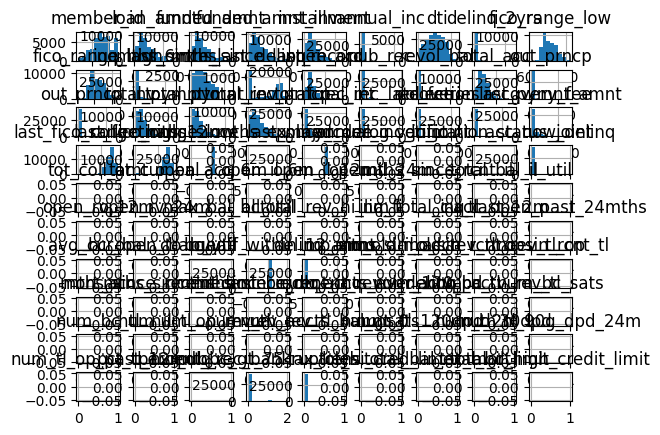

In [10]:
#understanding the data distribution for numerical column
loanDefault.hist()

# Data Issues Handling

### Null Values 

In [11]:
loanDefault.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
42538,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42539,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
42540,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
print(loanDefault.isnull().sum())

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64


In [13]:
missing_percentage = loanDefault.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
id                              0.009402
member_id                       0.016454
loan_amnt                       0.016454
funded_amnt                     0.016454
funded_amnt_inv                 0.016454
                                 ...    
tax_liens                       0.263269
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 115, dtype: float64


In [14]:
non_null_counts = loanDefault.notnull().sum(axis=1)

print("\nDistribution of non-null values per row:")
print(non_null_counts.value_counts().sort_index())


Distribution of non-null values per row:
0         4
1         3
44        5
45        8
46       16
53        2
54       11
55      262
56      878
57     8441
58    20328
59    10538
60     1936
61      110
Name: count, dtype: int64


In [15]:
# remove columns with more than 10% null values
threshold = 90  #10% missing
loanDefault = loanDefault.dropna(axis=1, thresh=int(len(loanDefault) * (1 - threshold/100)))

# fill nulls with median for numeric columns
numeric_columns = loanDefault.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    loanDefault[col].fillna(loanDefault[col].median(), inplace=True)

# fill nulls with mode for categorical columns 
categorical_columns = loanDefault.select_dtypes(include=['object']).columns
for col in categorical_columns:
    loanDefault[col].fillna(loanDefault[col].mode()[0], inplace=True)

print("\nRemaining null values:")
print(loanDefault.isnull().sum())


Remaining null values:
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
mths_since_last_

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_78456/3427795261.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loanDefault[col].fillna(loanDefault[col].median(), inplace=True)
/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_78456/3427795261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanDefault[col].fillna(

In [16]:
loanDefault.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_a

In [17]:
len(loanDefault.columns)

59

In [18]:
loanDefault.shape

(42542, 59)

### Outlier 

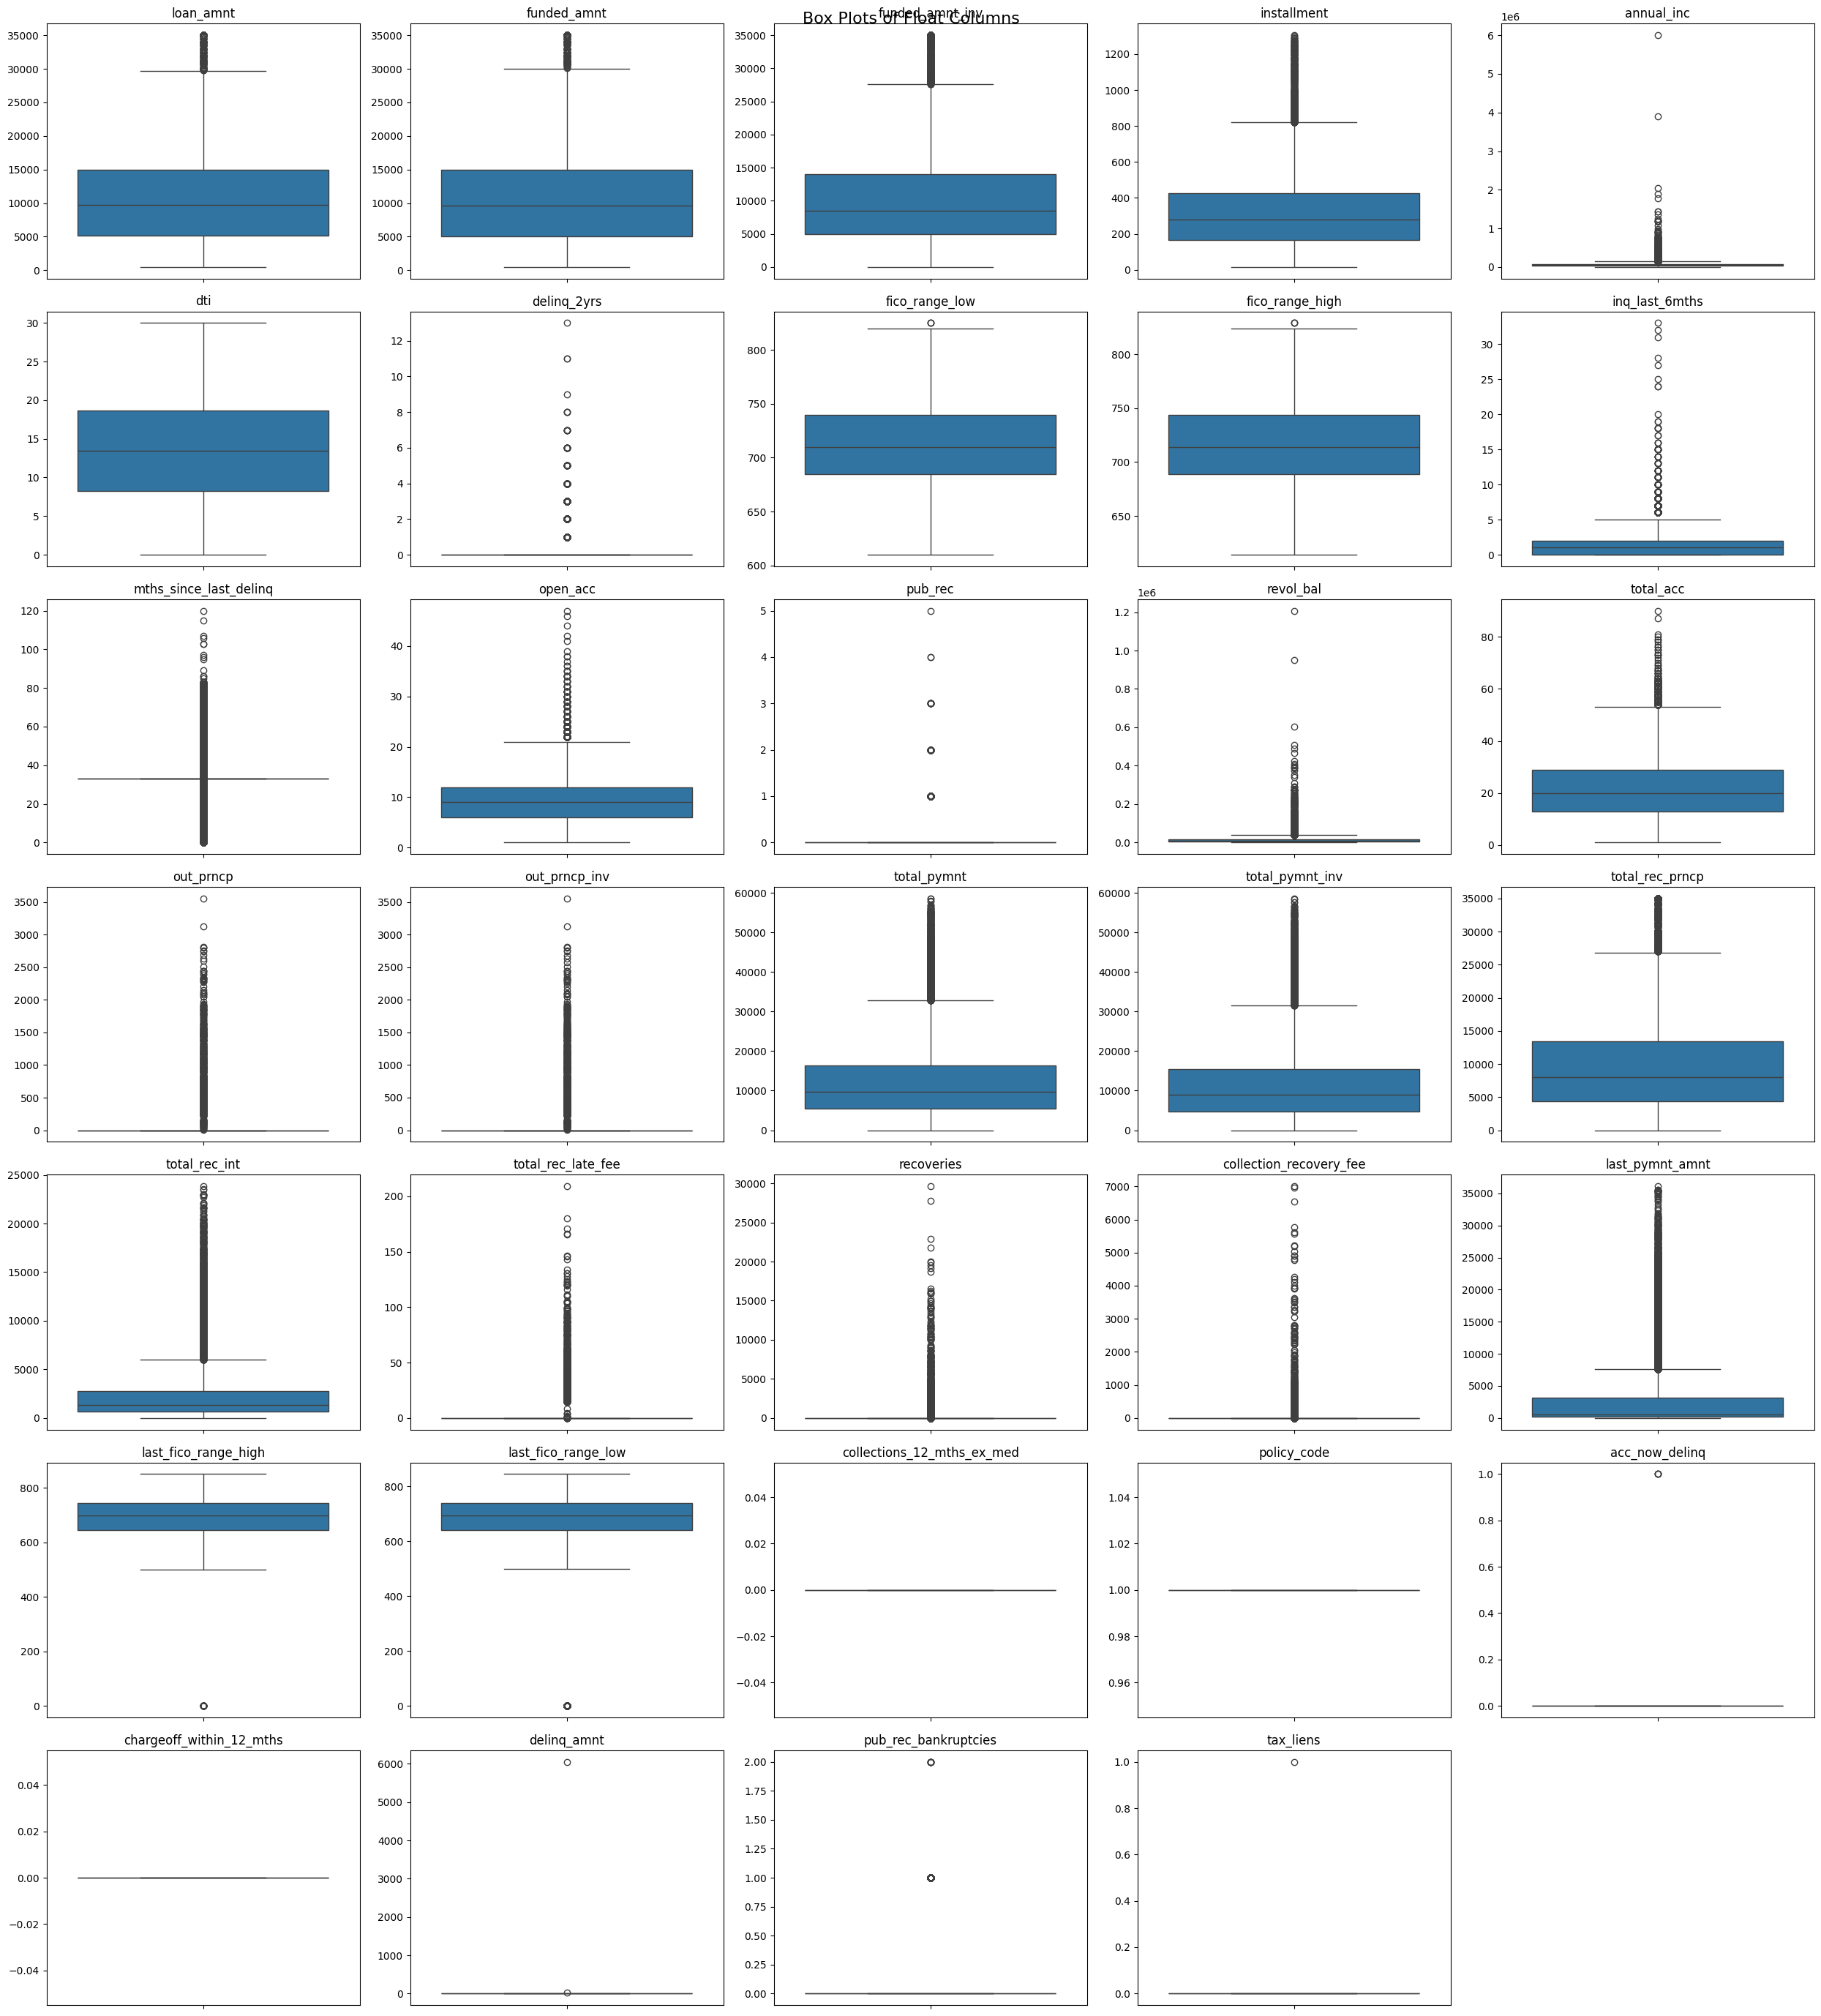

In [19]:
# get all float columns
float_columns = loanDefault.select_dtypes(include=['float64']).columns
float_columns = float_columns.drop('member_id')

# calculate the number of rows and columns for the subplot grid
n_cols = 5  # the number of plots per row
n_rows = (len(float_columns) - 1) // n_cols + 1

# create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Box Plots of Float Columns', fontsize=16)

# flatten the axes array for easier indexing
axes = axes.flatten()

# plot boxplots for each float column
for i, column in enumerate(float_columns):
    sns.boxplot(data=loanDefault, y=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')  # removing y-label as it's redundant with the title

# remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [20]:
# Capping method/Winsorization to remove outliers
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower, upper)
    return df

loanDefault = cap_outliers(loanDefault, 'loan_amnt')

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_78456/1978797754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower, upper)


In [21]:
with pd.option_context('display.max_columns', None):
    loanDefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42542 non-null  object 
 1   member_id                   42542 non-null  float64
 2   loan_amnt                   42542 non-null  float64
 3   funded_amnt                 42542 non-null  float64
 4   funded_amnt_inv             42542 non-null  float64
 5   term                        42542 non-null  object 
 6   int_rate                    42542 non-null  object 
 7   installment                 42542 non-null  float64
 8   grade                       42542 non-null  object 
 9   sub_grade                   42542 non-null  object 
 10  emp_title                   42542 non-null  object 
 11  emp_length                  42542 non-null  object 
 12  home_ownership              42542 non-null  object 
 13  annual_inc                  425

### Duplicating rows

In [22]:
# dropping off duplicating rows with same column values
loanDefault = loanDefault.drop_duplicates()

### Noisy Data

In [23]:
# # Identify numeric columns
# numeric_columns = loanDefault.select_dtypes(include=[np.number]).columns

# # Function to remove outliers
# def remove_outliers(df, columns, z_threshold=3):
#     for col in columns:
#         z_scores = np.abs(stats.zscore(df[col]))
#         df = df[z_scores < z_threshold]
#     return df

# # Remove outliers
# df_clean = remove_outliers(loanDefault, numeric_columns)

# # Apply robust scaling
# scaler = RobustScaler()
# df_clean[numeric_columns + '_scaled'] = scaler.fit_transform(df_clean[numeric_columns])

# # Smooth the data (example for one column, repeat for others as needed)
# example_column = numeric_columns[0]  # Choose a relevant numeric column
# df_clean[f'{example_column}_smoothed'] = df_clean[f'{example_column}_scaled'].rolling(window=3, center=True).mean()

# # Fill NaN values created by smoothing
# df_clean[f'{example_column}_smoothed'].fillna(method='bfill').fillna(method='ffill', inplace=True)

# print(df_clean.head())

# Exploratory Data Analysis (EDA)

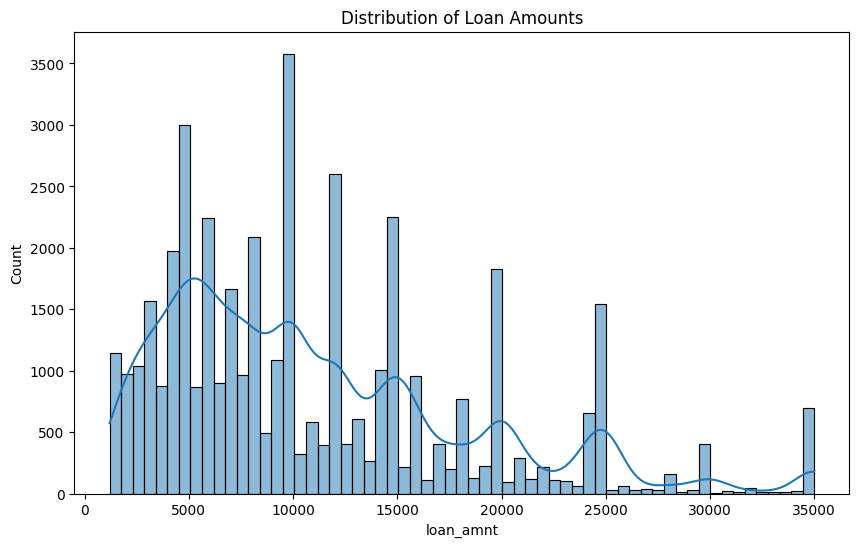

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(loanDefault['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

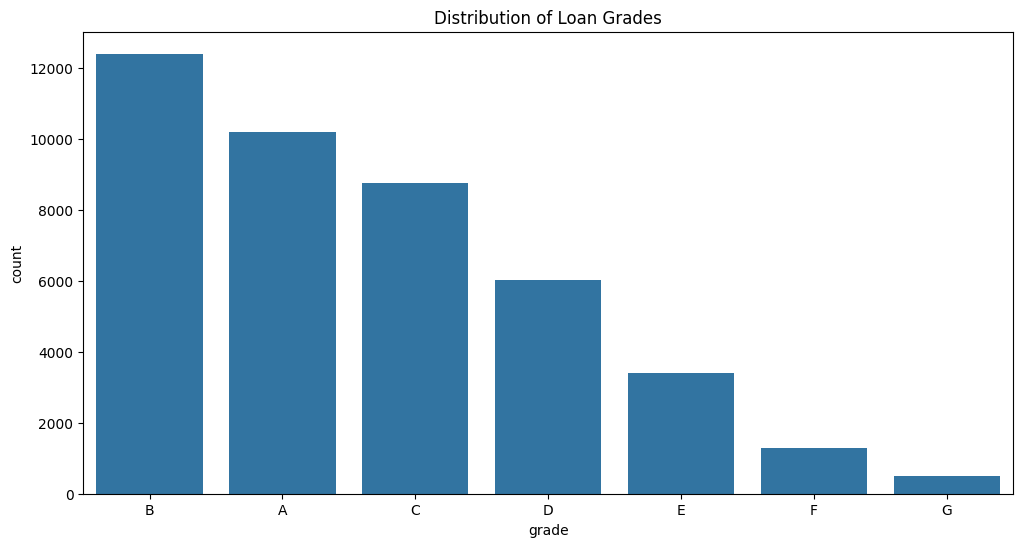

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', data=loanDefault, order=loanDefault['grade'].value_counts().index)
plt.title('Distribution of Loan Grades')
plt.show()

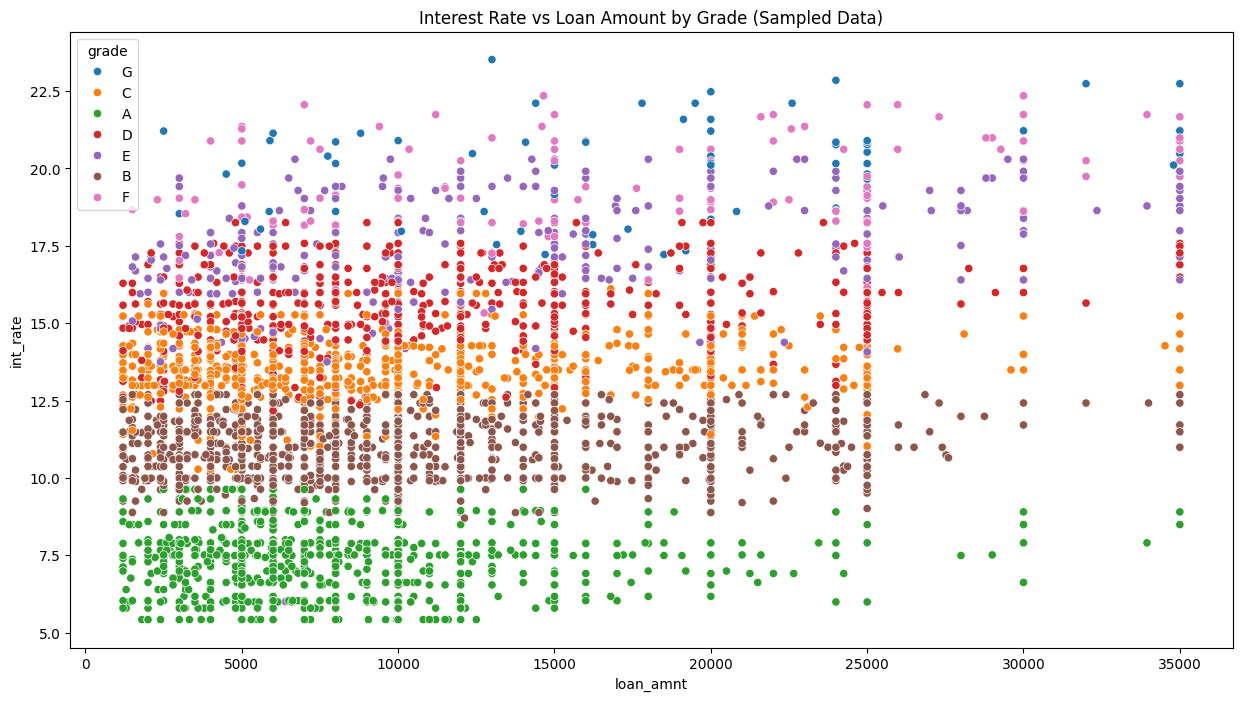

In [41]:
sampled_data = loanDefault.sample(frac=0.1, random_state=1)
plt.figure(figsize=(15, 8))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='grade', data=sampled_data)
plt.title('Interest Rate vs Loan Amount by Grade')
plt.show()

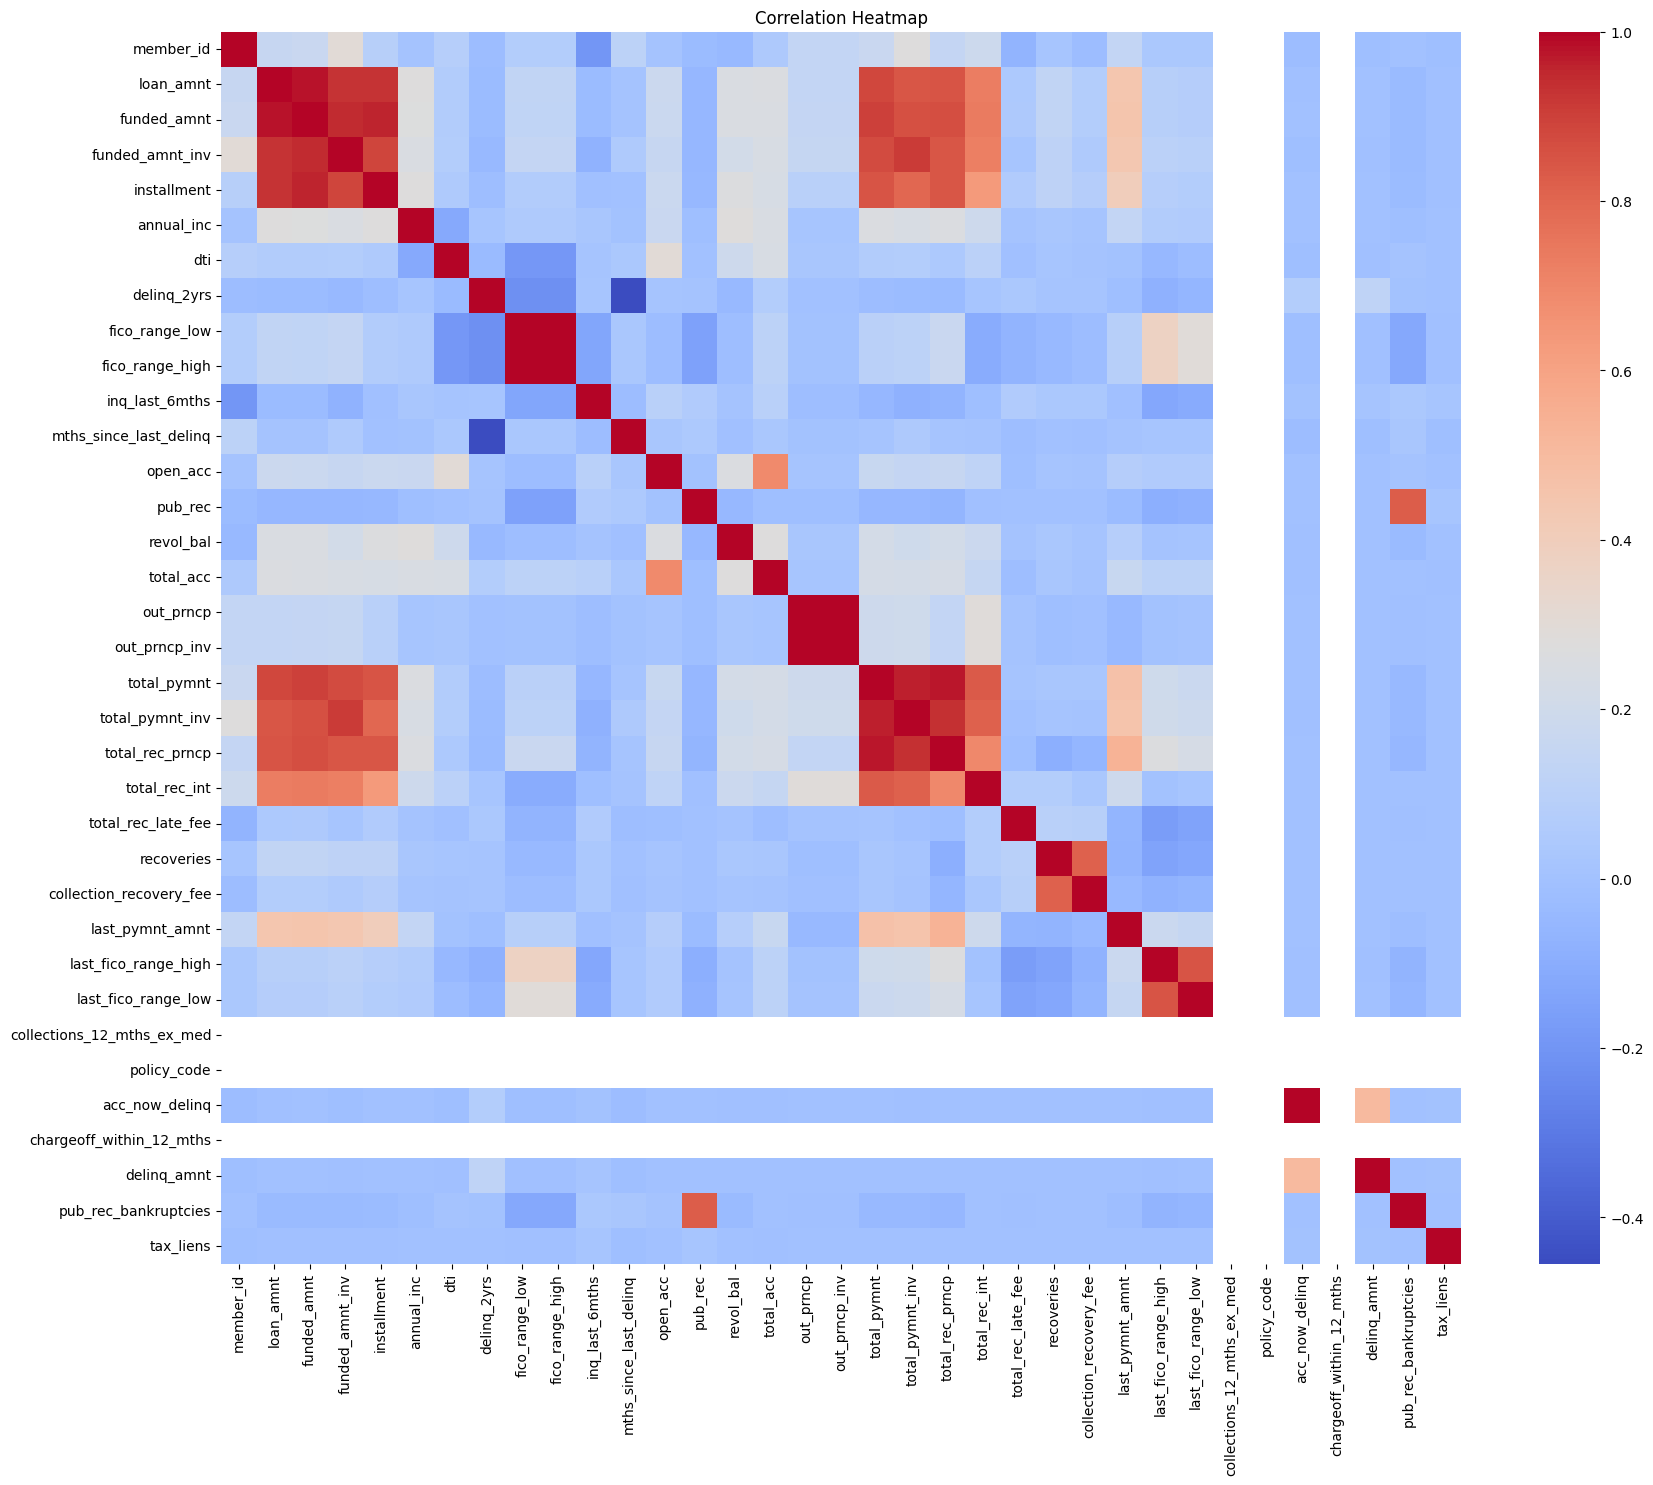

In [27]:
numeric_cols = loanDefault.select_dtypes(include=[np.number]).columns
correlation = loanDefault[numeric_cols].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

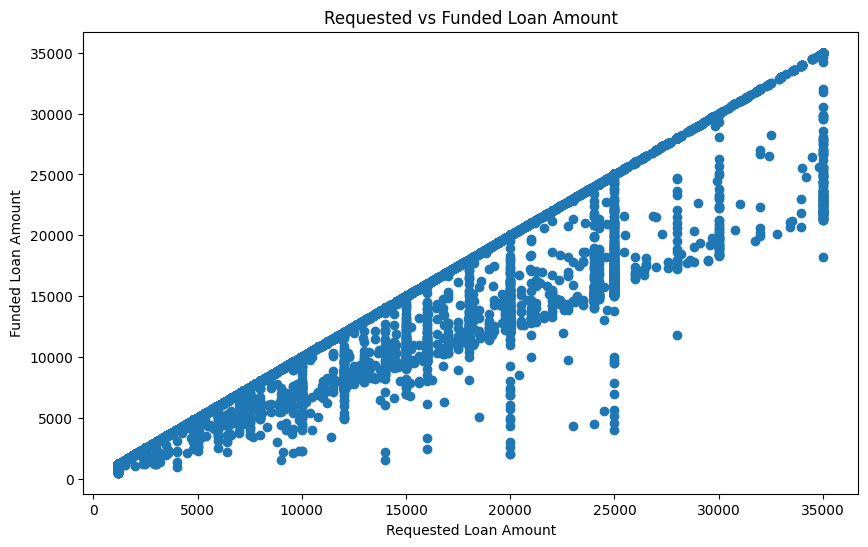

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(loanDefault['loan_amnt'], loanDefault['funded_amnt'])
plt.xlabel('Requested Loan Amount')
plt.ylabel('Funded Loan Amount')
plt.title('Requested vs Funded Loan Amount')
plt.show()

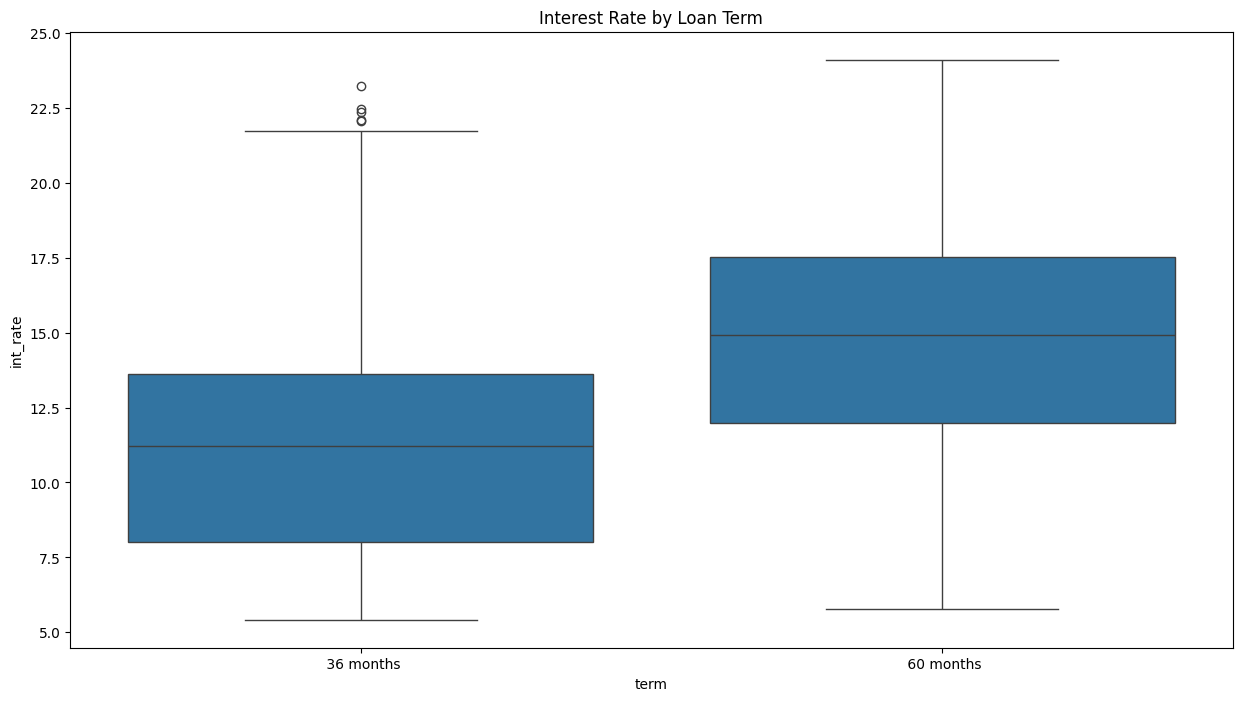

In [51]:
sampled_data = loanDefault.sample(frac=0.5, random_state=1)
plt.figure(figsize=(15, 8))
sns.boxplot(x='term', y='int_rate', data=sampled_data)
plt.title('Interest Rate by Loan Term')
plt.show()

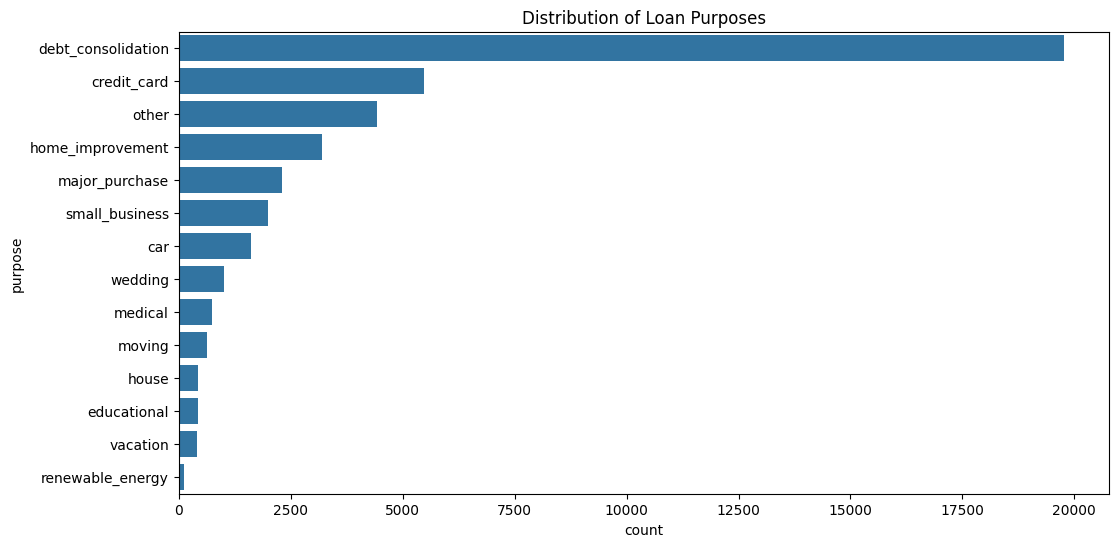

In [30]:
if 'purpose' in loanDefault.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='purpose', data=loanDefault, order=loanDefault['purpose'].value_counts().index)
    plt.title('Distribution of Loan Purposes')
    plt.show()

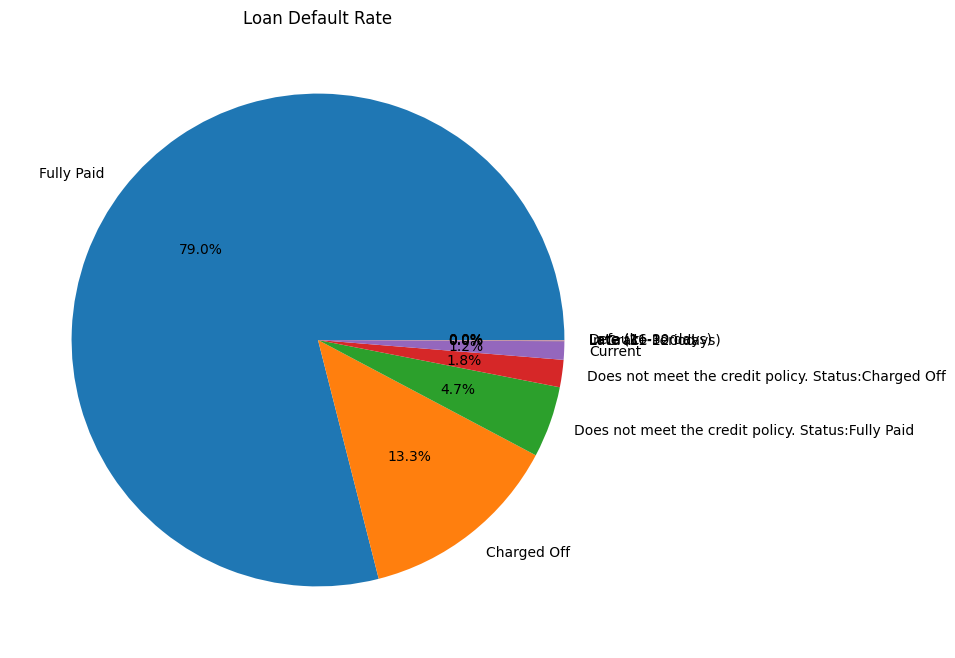

In [31]:
if 'loan_status' in loanDefault.columns:
    default_rate = loanDefault['loan_status'].value_counts(normalize=True)
    plt.figure(figsize=(8, 8))
    plt.pie(default_rate, labels=default_rate.index, autopct='%1.1f%%')
    plt.title('Loan Default Rate')
    plt.show()

In [32]:
print("Shape of dataframe after cleaning:", loanDefault.shape)
print("\nSample of cleaned data:")
print(loanDefault.head())

# Verify no nulls remain
assert loanDefault.isnull().sum().sum() == 0, "There are still null values in the dataset"

Shape of dataframe after cleaning: (42539, 59)

Sample of cleaned data:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_fico_range_high  \
0   10.65%       162.87     B        B2  ...                744.0   
1   15.27%        59.83     C        C4  ...                499.0   
2   15.96%        84.33     C        C5  ...                719.0   
3   13.49%       339.31     C        C1  ...                604.0   
4   12.69%        67.79     B        B5  ...                694.0   

  last_fico_range_low collections_12_mths_ex

# Descriptive Analysis

### Analysis 1: Analysis of loan default rates by loan characteristics 

In [33]:
loanDefault["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [34]:
def default_rate(x):
    return x.mean() * 100

loanDefault['default'] = loanDefault['loan_status'].isin(['Charged Off', 'Default'])

# Convert the 'int_rate' column to strings, remove '%' and convert to float
loanDefault['int_rate'] = loanDefault['int_rate'].astype(str).str.rstrip('%').astype('float')

# Bin the interest rates into 10 bins
loanDefault['int_rate_bin'] = pd.cut(loanDefault['int_rate'], bins=10)

# Group by interest rate bins and calculate the default rate
int_rate_default = loanDefault.groupby('int_rate_bin')['default'].agg(default_rate).reset_index()

print(int_rate_default)


       int_rate_bin    default
0    (5.401, 7.337]   4.632449
1    (7.337, 9.254]   6.984299
2   (9.254, 11.171]  10.332152
3  (11.171, 13.088]  13.794431
4  (13.088, 15.005]  14.659827
5  (15.005, 16.922]  19.028418
6  (16.922, 18.839]  22.911051
7  (18.839, 20.756]  27.058824
8  (20.756, 22.673]  33.137255
9   (22.673, 24.59]  37.662338


/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_78456/1207281836.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_default = loanDefault.groupby('int_rate_bin')['default'].agg(default_rate).reset_index()


In [35]:
# Bin the loan amounts into 10 bins and calculate default rates by loan amount
loanDefault['loan_amount_bin'] = pd.cut(loanDefault['loan_amnt'], bins=10)
loan_amount_default = loanDefault.groupby('loan_amount_bin')['default'].agg(default_rate).reset_index()

# Calculate default rates by term
term_default = loanDefault.groupby('term')['default'].agg(default_rate).reset_index()

# Plot default rates by loan amount
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_amount_bin', y='default', data=loan_amount_default)
plt.title('Default Rate by Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis1_default_rate_by_loan_amount.png')
plt.close()

# Plot default rates by term
plt.figure(figsize=(8, 6))
sns.barplot(x='term', y='default', data=term_default)
plt.title('Default Rate by Term')
plt.xlabel('Term')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.savefig('analysis1_default_rate_by_term.png')
plt.close()

# Plot default rates by interest rate
plt.figure(figsize=(12, 6))
sns.barplot(x='int_rate_bin', y='default', data=int_rate_default)
plt.title('Default Rate by Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis1_default_rate_by_interest_rate.png')
plt.close()

print("Analysis of loan default rates by loan characteristics completed. Graphs saved as PNG files.")

# Display summary statistics
print("\
Default rate by loan amount:")
print(loan_amount_default)

print("\
Default rate by term:")
print(term_default)

print("\
Default rate by interest rate:")
print(int_rate_default)

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_78456/1965594853.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_default = loanDefault.groupby('loan_amount_bin')['default'].agg(default_rate).reset_index()


Analysis of loan default rates by loan characteristics completed. Graphs saved as PNG files.
Default rate by loan amount:
      loan_amount_bin    default
0    (1166.2, 4580.0]  12.392881
1    (4580.0, 7960.0]  11.744584
2   (7960.0, 11340.0]  12.186035
3  (11340.0, 14720.0]  12.694793
4  (14720.0, 18100.0]  14.935345
5  (18100.0, 21480.0]  15.127920
6  (21480.0, 24860.0]  17.117834
7  (24860.0, 28240.0]  17.198486
8  (28240.0, 31620.0]  19.254658
9  (31620.0, 35000.0]  21.526909
Default rate by term:
         term    default
0   36 months  10.232101
1   60 months  22.061631
Default rate by interest rate:
       int_rate_bin    default
0    (5.401, 7.337]   4.632449
1    (7.337, 9.254]   6.984299
2   (9.254, 11.171]  10.332152
3  (11.171, 13.088]  13.794431
4  (13.088, 15.005]  14.659827
5  (15.005, 16.922]  19.028418
6  (16.922, 18.839]  22.911051
7  (18.839, 20.756]  27.058824
8  (20.756, 22.673]  33.137255
9   (22.673, 24.59]  37.662338


### Analysis 2: Geographic distribution of defaults, identifying regions with higher or lower than average default rates.

In [36]:
# Convert two-digit years to four-digit years (e.g., Dec-11 to Dec-2011)
loanDefault['issue_d'] = loanDefault['issue_d'].apply(lambda x: x if len(x.split('-')[1]) == 4 else x[:-2] + '20' + x[-2:])
loanDefault['last_pymnt_d'] = loanDefault['last_pymnt_d'].apply(lambda x: x if len(x.split('-')[1]) == 4 else x[:-2] + '20' + x[-2:])

# Now parse the dates
loanDefault['issue_d'] = pd.to_datetime(loanDefault['issue_d'], format='%b-%Y')
loanDefault['last_pymnt_d'] = pd.to_datetime(loanDefault['last_pymnt_d'], format='%b-%Y')

In [37]:
loanDefault['default'] = loanDefault['loan_status'].isin(['Charged Off', 'Default'])

# Geographic distribution of defaults
state_default_rates = loanDefault.groupby('addr_state')['default'].agg(['mean', 'count']).reset_index()
state_default_rates['default_rate'] = state_default_rates['mean'] * 100
state_default_rates = state_default_rates.sort_values('default_rate', ascending=False)

# Calculate the average default rate
avg_default_rate = loanDefault['default'].mean() * 100

# Plot geographic distribution of defaults
plt.figure(figsize=(15, 8))
sns.barplot(x='addr_state', y='default_rate', data=state_default_rates)
plt.axhline(y=avg_default_rate, color='r', linestyle='--', label='Average Default Rate')
plt.title('Default Rate by State')
plt.xlabel('State')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('analysis2_default_rate_by_state.png')
plt.close()

print("Geographic distribution of defaults and time taken for loans to default analysis completed. Graphs saved as PNG files.")

# Display summary statistics
print("\
Top 10 states with highest default rates:")
print(state_default_rates.head(10))

print("\
\nBottom 10 states with lowest default rates:")
print(state_default_rates.tail(10))

Geographic distribution of defaults and time taken for loans to default analysis completed. Graphs saved as PNG files.
Top 10 states with highest default rates:
   addr_state      mean  count  default_rate
28         NE  0.272727     11     27.272727
32         NV  0.206831    527     20.683112
0          AK  0.186047     86     18.604651
40         SD  0.179104     67     17.910448
9          FL  0.163660   3104     16.365979
11         HI  0.154696    181     15.469613
4          CA  0.151756   7433     15.175568
36         OR  0.151709    468     15.170940
24         MO  0.149020    765     14.901961
43         UT  0.147482    278     14.748201

Bottom 10 states with lowest default rates:
   addr_state      mean  count  default_rate
45         VT  0.105263     57     10.526316
16         KS  0.104027    298     10.402685
8          DE  0.088235    136      8.823529
25         MS  0.076923     26      7.692308
7          DC  0.066964    224      6.696429
41         TN  0.062500     3

### Analysis 3: Examine the time taken for loans to default after issuance.

In [38]:
loanDefault['issue_d'] = pd.to_datetime(loanDefault['issue_d'], format='%b-%Y')
loanDefault['last_pymnt_d'] = pd.to_datetime(loanDefault['last_pymnt_d'], format='%b-%Y')

#calculating the time for default to occur in the time frame of 30 months 
loanDefault['time_to_default'] = (loanDefault['last_pymnt_d'] - loanDefault['issue_d']).dt.days / 30 

defaulted_loans = loanDefault[loanDefault['loan_status'].isin(['Charged Off', 'Default'])]

default_time_stats = defaulted_loans['time_to_default'].describe()
print(default_time_stats)


# # Time taken for loans to default
# loanDefault['issue_d'] = pd.to_datetime(loanDefault['issue_d'], format='%b-%Y')
# loanDefault['last_pymnt_d'] = pd.to_datetime(loanDefault['last_pymnt_d'], format='%b-%Y')
# loanDefault['time_to_default'] = (loanDefault['last_pymnt_d'] - loanDefault['issue_d']).dt.days / 30  # in months

# defaulted_loans = loanDefault[loanDefault['default']]
# defaulted_loans = defaulted_loans[defaulted_loans['time_to_default'] >= 0]  # Remove negative values

# # Plot distribution of time to default
# plt.figure(figsize=(12, 6))
# sns.histplot(defaulted_loans['time_to_default'], bins=50, kde=True)
# plt.title('Distribution of Time to Default')
# plt.xlabel('Time to Default (months)')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.savefig('analysis2_time_to_default_distribution.png')
# plt.close()

# print("\
# Summary statistics of time to default (in months):")
# print(defaulted_loans['time_to_default'].describe())

count    5654.000000
mean       20.009893
std        12.417822
min         0.933333
25%        10.141667
50%        18.266667
75%        27.433333
max        67.000000
Name: time_to_default, dtype: float64


In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(defaulted_loans['time_to_default'], bins=20, kde=True)
plt.title('Distribution of Time to Default')
plt.xlabel('Time to Default (Months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('analysis3_time_to_default_distribution.png')
plt.close()

# Predictive Modelling: Model Building 

In [40]:
from sklearn.ensemble import RandomForestClassifier

## Feature Selection

In [52]:
loanDefault.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_a

In [53]:
loanDefault['acc_now_delinq'].unique()

array([0., 1.])

In [54]:
loanDefault = loanDefault.drop(columns=['emp_title', 'url', 'policy_code', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 
                                        'earliest_cr_line', 'revol_bal', 'initial_list_status', 'application_type'])

In [57]:
loanDefault.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42539 entries, 0 to 42541
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          42539 non-null  object        
 1   member_id                   42539 non-null  float64       
 2   loan_amnt                   42539 non-null  float64       
 3   funded_amnt                 42539 non-null  float64       
 4   funded_amnt_inv             42539 non-null  float64       
 5   term                        42539 non-null  object        
 6   int_rate                    42539 non-null  float64       
 7   installment                 42539 non-null  float64       
 8   grade                       42539 non-null  object        
 9   sub_grade                   42539 non-null  object        
 10  emp_length                  42539 non-null  object        
 11  home_ownership              42539 non-null  object        


## Feature Engineering

In [ ]:
#converting data types (encoding categorical variables, date types)

#chosen encoding methods: one-hot encoding/binary encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder



## Dataset Splitting